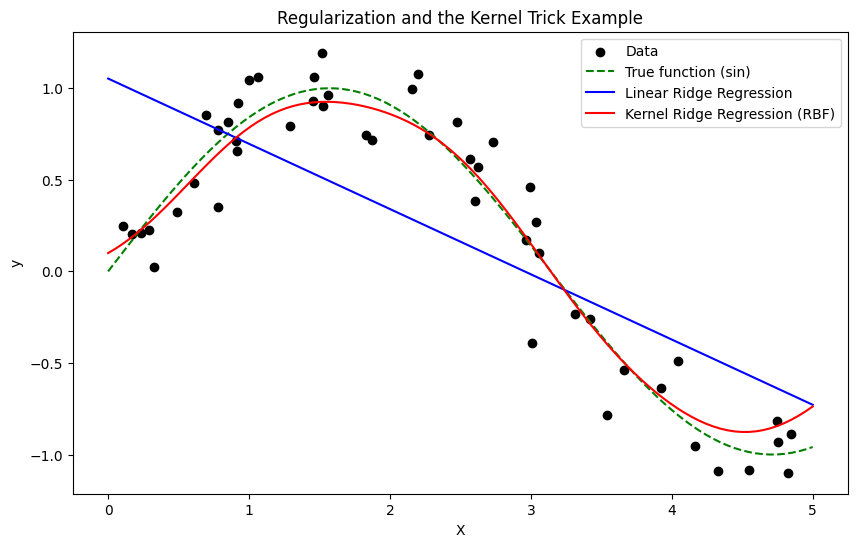

MSE (Linear Ridge): 0.213
MSE (Kernel Ridge): 0.034


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 1. Generate a nonlinear dataset
np.random.seed(42)
n_samples = 50
X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)  # Inputs in [0, 5]
y = np.sin(X).ravel()  # Nonlinear function
y += 0.2 * np.random.randn(n_samples)  # Add noise

# Create a dense grid for plotting predictions
X_plot = np.linspace(0, 5, 100)[:, None]

# 2. Fit a standard linear ridge regression (for comparison)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_ridge = ridge.predict(X_plot)

# 3. Fit kernel ridge regression using the RBF kernel
kr = KernelRidge(alpha=1.0, kernel='rbf', gamma=1.0)  # gamma = 1/(2*sigma^2)
kr.fit(X, y)
y_kr = kr.predict(X_plot)

# 4. Visualize the data and the fits
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_plot, np.sin(X_plot), color='green', linestyle='--', label='True function (sin)')
plt.plot(X_plot, y_ridge, color='blue', label='Linear Ridge Regression')
plt.plot(X_plot, y_kr, color='red', label='Kernel Ridge Regression (RBF)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regularization and the Kernel Trick Example')
plt.legend()
plt.show()

# 5. Compute and print mean squared errors on training data for reference
mse_ridge = mean_squared_error(y, ridge.predict(X))
mse_kr = mean_squared_error(y, kr.predict(X))
print(f'MSE (Linear Ridge): {mse_ridge:.3f}')
print(f'MSE (Kernel Ridge): {mse_kr:.3f}')


/Users/muntazirabidi/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.507e+02, tolerance: 5.021e-01
  model = cd_fast.enet_coordinate_descent(


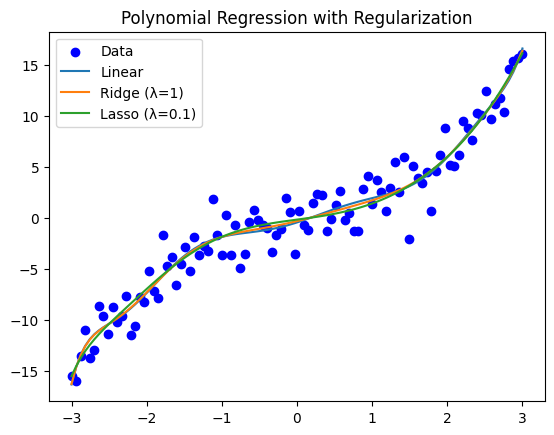

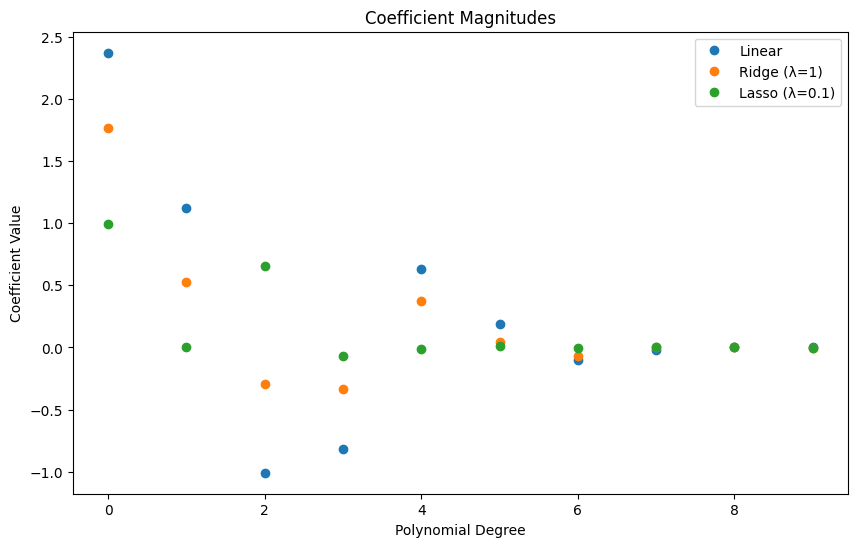

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
x = np.linspace(-3, 3, 100)
y = 0.5 * x**3 + x + np.random.normal(0, 2, 100)
x = x.reshape(-1, 1)

# Create models
degree = 10
models = [
    ('Linear', make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())),
    ('Ridge (λ=1)', make_pipeline(PolynomialFeatures(degree, include_bias=False), Ridge(alpha=1.0))),
    ('Lasso (λ=0.1)', make_pipeline(PolynomialFeatures(degree, include_bias=False), Lasso(alpha=0.1)))
]

# Plot data and predictions
plt.scatter(x, y, color='blue', label='Data')
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
for name, model in models:
    model.fit(x, y)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, label=name)

plt.legend()
plt.title('Polynomial Regression with Regularization')
plt.show()

# Plot coefficients
plt.figure(figsize=(10, 6))
for name, model in models:
    coef = model.named_steps[model.steps[-1][0]].coef_
    plt.plot(coef, marker='o', linestyle='none', label=name)

plt.legend()
plt.title('Coefficient Magnitudes')
plt.xlabel('Polynomial Degree')
plt.ylabel('Coefficient Value')
plt.show()

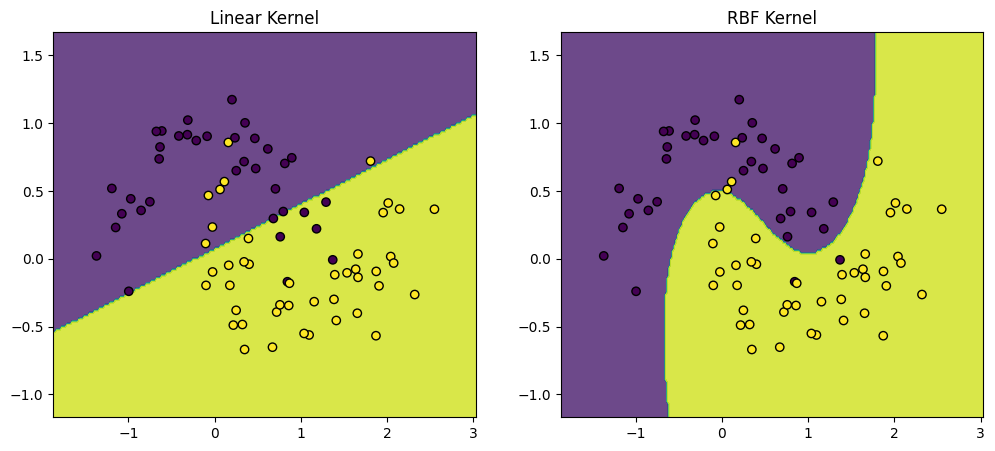

In [3]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate non-linear data (moons)
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVMs with different kernels
svm_linear = SVC(kernel='linear').fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf', gamma='scale').fit(X_train, y_train)

# Plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_linear, X_train, y_train, 'Linear Kernel')
plt.subplot(1, 2, 2)
plot_decision_boundary(svm_rbf, X_train, y_train, 'RBF Kernel')
plt.show()